### 1. Importing the libraires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from Data_analysis import Univariate_class as UC

### 2.Import the dataset and basic info

In [2]:
dataset=pd.read_csv("Zomato Chennai Listing 2020.csv")

In [3]:
dataset

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [4]:
#Get the basic information

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
#check the null values
dataset.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

### 3. Clean the data

### a.Removing the redundunt rows of data

In [7]:
dataset=dataset.drop(["Zomato URL","Address"],axis=1)

### b.removing the null values

In [8]:
dataset=dataset.fillna(0)

In [9]:
dataset.isna().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

### c.verify the number columns data type

In [10]:
d=["Price for 2","Dining Rating","Dining Rating Count","Delivery Rating","Delivery Rating Count"]
for u in d:
    print(u," : ",dataset[u].dtype)

Price for 2  :  float64
Dining Rating  :  float64
Dining Rating Count  :  object
Delivery Rating  :  float64
Delivery Rating Count  :  object


In [11]:
#Dining Rating Count  and Delivery Rating Count are in object type so need to check and replaced the data

### e.check the unique data in numerical columns

In [12]:
ds=dataset
ds["Dining Rating Count"].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
1893                            1
742                             1
1363                            1
1094                            1
1266                            1
Name: count, Length: 794, dtype: int64

In [13]:
ds["Delivery Rating Count"].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
0                               220
27                               34
22                               30
                               ... 
39600                             1
21700                             1
4320                              1
24700                             1
10500                             1
Name: count, Length: 2282, dtype: int64

In [14]:
#replace the object values

In [15]:
dy=["Does not offer Dining","Not enough Dining Reviews"]  
ds["Dining Rating Count"]=ds["Dining Rating Count"].replace(to_replace=dy,value=0)  

In [16]:
ds["Dining Rating Count"].value_counts()
#Dining Rating Count column verified, now data type was integer 

Dining Rating Count
0       5351
4        339
5        271
6        248
8        180
        ... 
5821       1
742        1
1363       1
1094       1
1266       1
Name: count, Length: 792, dtype: int64

In [17]:
dt=["Delivery Rating Count","Not enough Delivery Reviews","Does not offer Delivery"]  
ds["Delivery Rating Count"]=ds["Delivery Rating Count"].replace(to_replace=dt,value=0) 

In [18]:
ds["Delivery Rating Count"].value_counts()
#Delivery Rating Count column verified, now data type was integer

Delivery Rating Count
0        5851
27         34
32         30
37         30
40         30
         ... 
50100       1
2744        1
10500       1
39200       1
1617        1
Name: count, Length: 2280, dtype: int64

In [57]:
ds["Dining Rating Count"].dtype

dtype('int64')

In [20]:
ds["Delivery Rating Count"].dtype

dtype('O')

In [21]:
#To check the object data

In [22]:
un=ds["Delivery Rating Count"].unique()
non_numeric=[]
for val in un:
    try:
        int(val)
    except (ValueError, TypeError):
        non_numeric.append(val)

print("Non-numeric values:", non_numeric)

Non-numeric values: []


In [23]:
#Covert the datatype

In [24]:
ds["Dining Rating Count"]=ds["Dining Rating Count"].astype('int64')
ds["Delivery Rating Count"]=ds["Delivery Rating Count"].astype('int64')

## 4.Removing the irrelevant data

In [25]:
#need to remove the 0 value data else it will be false analysis, the min and mean, median value will be defer.

In [26]:
ds.shape

(12032, 10)

In [27]:
ds["Dining Rating"].value_counts().get(0.0,0)
#c=(ds["Dining Rating"] == 3.7).sum()
#5351 records are ther in 0.0 values

np.int64(5351)

In [28]:
ds["Delivery Rating"].value_counts().get(0.0,0)
#5851 values are ther in 0.0 values

np.int64(5851)

In [29]:
ds["Dining Rating Count"].value_counts().get(0.0,0)
#Totally 5371 records are there in 0 value

np.int64(5371)

In [30]:
ds["Delivery Rating Count"].value_counts().get(0.0,0)
#Totally we have 5870 datas are there in 0 value

np.int64(5870)

### a.removeing the all 0 values

In [31]:
ds=ds[ds["Delivery Rating Count"]!=0]
ds=ds[ds["Delivery Rating"]!=0]
ds=ds[ds["Dining Rating Count"]!=0]
ds=ds[ds["Dining Rating"]!=0]

In [32]:
ds.shape

(4361, 10)

In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4361 entries, 0 to 11794
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     4361 non-null   object 
 1   Location               4361 non-null   object 
 2   Cuisine                4361 non-null   object 
 3   Top Dishes             4361 non-null   object 
 4   Price for 2            4361 non-null   float64
 5   Dining Rating          4361 non-null   float64
 6   Dining Rating Count    4361 non-null   int64  
 7   Delivery Rating        4361 non-null   float64
 8   Delivery Rating Count  4361 non-null   int64  
 9   Features               4361 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 374.8+ KB


In [34]:
#It will check the 4 columns and show if we have 0 values
obj=UC()
Qual,Quan=obj.Qual_Quan(ds)
H=0
for t in Qual:
    if t in ds.columns:
        if 0 in ds[t].values:
            print(t)

### b.To check the Univariate analysis

In [35]:
Uni=obj.univariate(ds,Quan)
Uni

,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
Mean,436.152259,3.466613,169.734694,3.843545,1687.994038
Median,400.0,3.5,54.0,3.9,435.0
Mode,300.0,3.7,4,3.9,51
Q1:25%,300.0,3.2,19.0,3.7,125.0
Q2:50%,400.0,3.5,54.0,3.9,435.0
Q3:75%,500.0,3.8,169.0,4.0,1573.0
Q4:100%,3000.0,4.9,5407.0,4.7,59900.0
IQR,200.0,0.6,150.0,0.3,1448.0
1.5rule,300.0,0.9,225.0,0.45,2172.0
Lesser,0.0,2.3,-206.0,3.25,-2047.0


### C.To check the outliers using Univariate data

In [36]:
lesser, greater=obj.check_outliers(Quan,Uni)
print(lesser,greater)

['Dining Rating', 'Delivery Rating'] ['Price for 2', 'Dining Rating', 'Dining Rating Count', 'Delivery Rating', 'Delivery Rating Count']


### D.Change the outliers

In [37]:
Change=obj.change_outlier(Uni)
Change

,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
Mean,436.152259,3.466613,169.734694,3.843545,1687.994038
Median,400.0,3.5,54.0,3.9,435.0
Mode,300.0,3.7,4,3.9,51
Q1:25%,300.0,3.2,19.0,3.7,125.0
Q2:50%,400.0,3.5,54.0,3.9,435.0
Q3:75%,500.0,3.8,169.0,4.0,1573.0
Q4:100%,800.0,4.7,394.0,4.45,3745.0
IQR,200.0,2.3,150.0,3.25,1448.0
1.5rule,300.0,2.3,225.0,3.25,2172.0
Lesser,0.0,2.3,-206.0,3.25,-2047.0


In [38]:
#Verify the outliers
lesser, greater=obj.check_outliers(Quan,Uni)
print(lesser,greater)

[] []


### E.Working on 'Top Dishes' Column

In [39]:
ds["Top Dishes"].value_counts()

Top Dishes
Invalid                                                                                 2683
['Biryani']                                                                               25
['Chicken Biryani']                                                                       11
['Coffee']                                                                                10
['Sandwich']                                                                               9
                                                                                        ... 
['Milky Way', ' Chocolate Sundae', ' Faluda']                                              1
['Sandwich', ' Milky Way', ' Cheese Chilli Toast', ' French Fries', ' Cheese Balls']       1
['Milky Way', ' Choco Brownie']                                                            1
['Mexican Shawarma']                                                                       1
['Zinger Burger']                                          

In [40]:
#Data count before removing Invalid
ds.shape

(4361, 10)

In [41]:
#To rempove the Invalid data in Top dishes column
ds=ds[ds["Top Dishes"] != "Invalid"]

In [42]:
#Data count after removing Invalid
ds.shape

(1678, 10)

### F.Working on "Location" column

In [43]:
#Check the total Location with count
df_counts=ds["Location"].value_counts().reset_index()
print(df_counts.to_string())

                                               Location  count
0                                       Anna Nagar East     87
1                                          Nungambakkam     74
2                                             Velachery     69
3                                                 Adyar     68
4                                              T. Nagar     67
5                                       Anna Nagar West     47
6                                               Kilpauk     46
7                                          Thuraipakkam     41
8                                                 Porur     40
9                                           Ashok Nagar     40
10                                             Alwarpet     39
11                                            Perungudi     39
12                                         Besant Nagar     37
13                                            Ramapuram     37
14                                             Mylapore

In [44]:
ds["Location"].value_counts()

Location
Anna Nagar East                                       87
Nungambakkam                                          74
Velachery                                             69
Adyar                                                 68
T. Nagar                                              67
                                                      ..
Chennai Food Town, Thuraipakkam                        1
Gokulam Park Sabari - OMR, Old Mahabalipuram Road      1
Anna Salai                                             1
Spencer Plaza Mall, Thousand Lights                    1
RK Salai (Cathedral Road)                              1
Name: count, Length: 142, dtype: int64

In [45]:
ds.shape

(1678, 10)

In [61]:
#To remove the unformatted location data
ds=ds[~ds["Location"].str.contains(",", na=False)]
ds=ds[~ds["Location"].str.contains(r"\(")]

In [62]:
df_counts=ds["Location"].value_counts().reset_index()
print(df_counts.to_string())

                                 Location  count
0                         Anna Nagar East     87
1                            Nungambakkam     74
2                               Velachery     69
3                                   Adyar     68
4                                T. Nagar     67
5                         Anna Nagar West     47
6                                 Kilpauk     46
7                            Thuraipakkam     41
8                                   Porur     40
9                             Ashok Nagar     40
10                               Alwarpet     39
11                              Perungudi     39
12                              Ramapuram     37
13                           Besant Nagar     37
14                               Mylapore     36
15                              Mogappair     32
16                                 Egmore     29
17                               Selaiyur     26
18                              Chromepet     26
19                  

In [63]:
ds["Location"].value_counts()

Location
Anna Nagar East    87
Nungambakkam       74
Velachery          69
Adyar              68
T. Nagar           67
                   ..
Abhiramapuram       1
Shenoy Nagar        1
Park Town           1
Arumbakkam          1
Anna Salai          1
Name: count, Length: 97, dtype: int64

In [64]:
ds.shape

(1554, 10)

### G.Remove the all duplicate values

In [50]:
# Dropping all the duplicate rows 
ds = ds.drop_duplicates() 

In [51]:
ds.shape

(1562, 10)

### 5.Copying the cleaned data into a new DataFrame

In [53]:
Zomato_data=ds.copy()

In [56]:
Zomato_data.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


### 6. Performing Exploratory Data Analysis

#### a) How many restaurants are in Chennai for each type of cuisine?

In [333]:
import warnings
warnings.filterwarnings('ignore')
#Ingore few graphs warning, those warning due to old code method

<Axes: ylabel='count'>

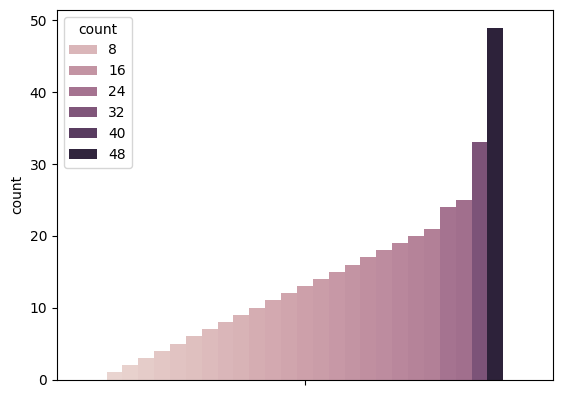

In [105]:
Cuisine=Zomato_data["Cuisine"].value_counts()
sns.barplot(y=Cuisine,data=Zomato_data,hue=Cuisine)

In [106]:
Cuisine.head(10)

Cuisine
['Pizza', ' Fast Food']                                                    49
['North Indian', ' Chinese']                                               33
['South Indian']                                                           25
['South Indian', ' Biryani', ' Chinese', ' North Indian']                  24
['Healthy Food', ' Fast Food']                                             21
['Asian', ' Chinese', ' Momos']                                            20
['Ice Cream']                                                              19
['Burger', ' Fast Food', ' Finger Food', ' Beverages']                     19
['North Indian', ' South Indian', ' Desserts', ' Beverages', ' Mithai']    18
['Burger', ' Fast Food']                                                   18
Name: count, dtype: int64

In [107]:
#Pizza, Fast Food are the most famous cuisine in chennai.

### b) Which location Restaurant have most no of rating

<Axes: xlabel='Location', ylabel='Dining Rating'>

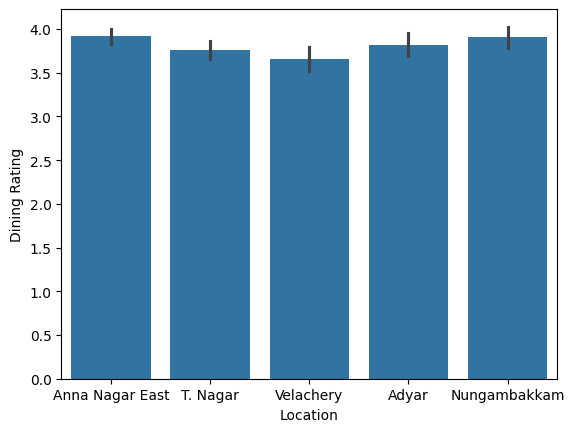

In [217]:
#To trim the Location data, Get the most frequent data in Location
L=Zomato_data["Location"].value_counts().head(5).index
#Store the trim data.
fil= Zomato_data[Zomato_data["Location"].isin(L)]
sns.barplot(x="Location",y="Dining Rating",data=fil)

In [ ]:
#Anna Nagar restaurant have most no of rating in Dining

<Axes: xlabel='Location', ylabel='Delivery Rating'>

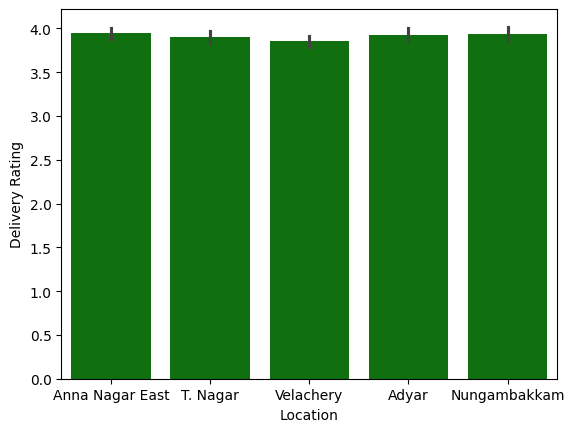

In [218]:
L=Zomato_data["Location"].value_counts().head(5).index
fil= Zomato_data[Zomato_data["Location"].isin(L)]
sns.barplot(x="Location",y="Delivery Rating",data=fil,color="green")

In [ ]:
#Adyar and Nungambakkam restaurant have most no of rating in delivery

### c)Which one have most no of rating Delivery or Dining?

<Axes: xlabel='Dining Rating', ylabel='count'>

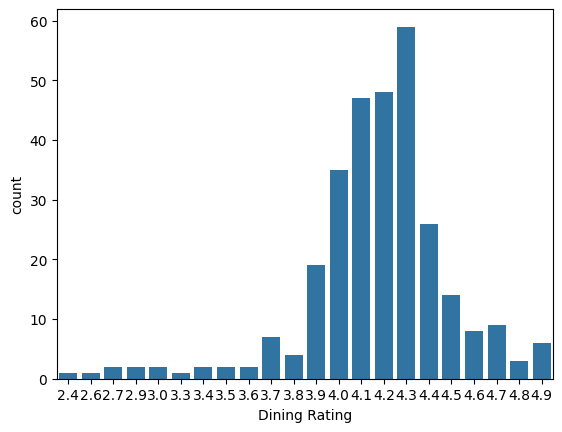

In [167]:
DR=Zomato_data["Dining Rating"].head(300)
sns.countplot(x=DR,data=Zomato_data)

<Axes: xlabel='Delivery Rating', ylabel='count'>

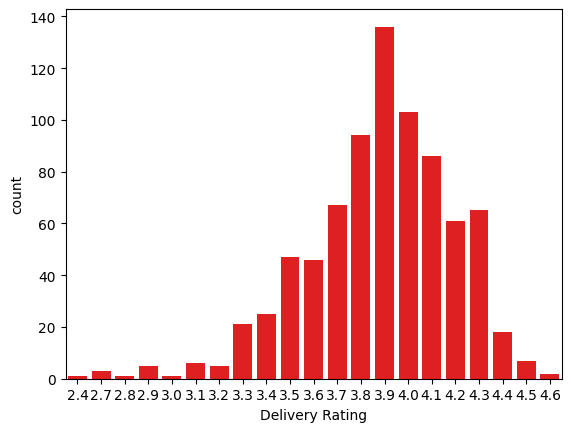

In [164]:
DR=Zomato_data["Delivery Rating"].head(800)
sns.countplot(x=DR,data=Zomato_data,color="red")

In [139]:
#Dining rating highest rating 4.3 compare to delivery rating 3.9

### d) Which Restaurant have most no of rating

In [ ]:
#To trim the Restaurant data, Get the most frequent data in Restaurants.
Lo=Zomato_data["Name of Restaurant"].value_counts().head(5).index
#Store the trim data.
fil= Zomato_data[Zomato_data["Name of Restaurant"].isin(Lo)]

[Text(0, 0, 'Sangeetha Veg Restaurant'),
 Text(1, 0, 'Dindigul Thalappakatti'),
 Text(2, 0, "Domino's Pizza"),
 Text(3, 0, 'Subway'),
 Text(4, 0, 'Wangs Kitchen')]

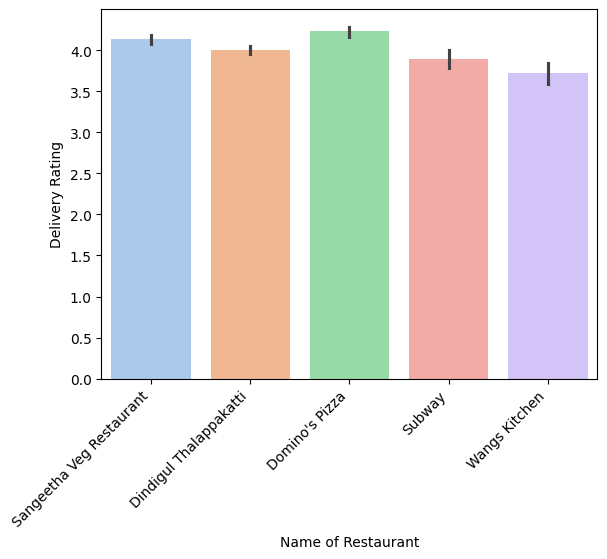

In [334]:
ax=sns.barplot(x="Name of Restaurant",y="Delivery Rating",data=fil,palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [ ]:
#Domino's Pizza had more no of Delivery reating in Restaurant 

[Text(0, 0, 'Sangeetha Veg Restaurant'),
 Text(1, 0, 'Dindigul Thalappakatti'),
 Text(2, 0, "Domino's Pizza"),
 Text(3, 0, 'Subway'),
 Text(4, 0, 'Wangs Kitchen')]

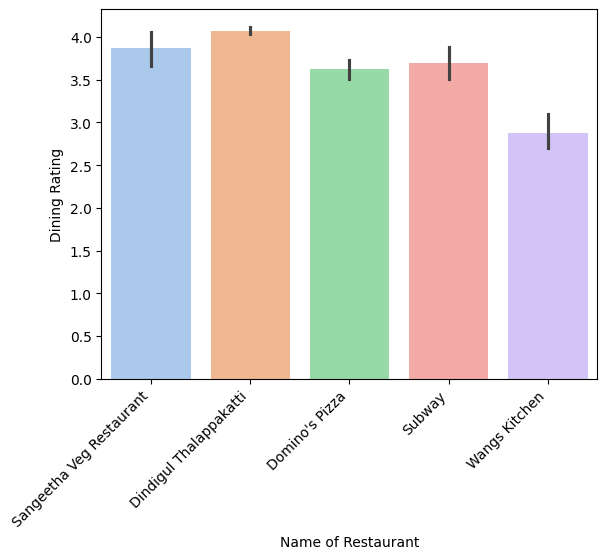

In [332]:
ax=sns.barplot(x="Name of Restaurant",y="Dining Rating",data=fil,palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [ ]:
#Dindigul Thalappakatti had more no of Dinning reating in Restaurant 

### E) Which Restaurant have most no of counting 

[Text(0, 0, 'Sangeetha Veg Restaurant'),
 Text(1, 0, 'Dindigul Thalappakatti'),
 Text(2, 0, "Domino's Pizza"),
 Text(3, 0, 'Subway'),
 Text(4, 0, 'Wangs Kitchen')]

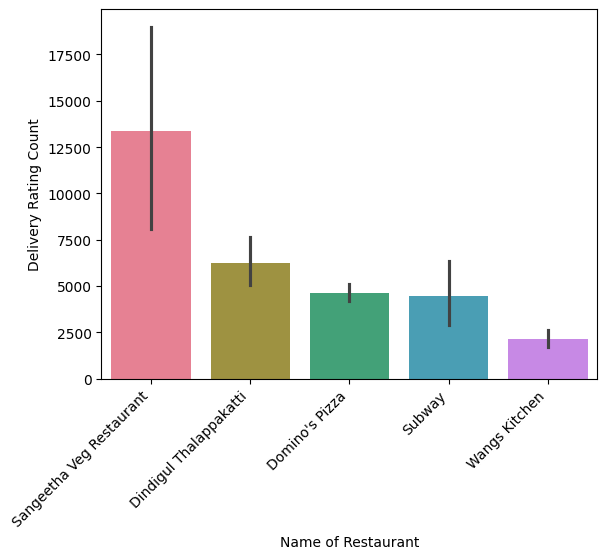

In [335]:
ax=sns.barplot(x="Name of Restaurant",y="Delivery Rating Count",data=fil,palette="husl")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [ ]:
#Most of the people ordered delivery foos in Sangeetha Veg Restaurant

[Text(0, 0, 'Sangeetha Veg Restaurant'),
 Text(1, 0, 'Dindigul Thalappakatti'),
 Text(2, 0, "Domino's Pizza"),
 Text(3, 0, 'Subway'),
 Text(4, 0, 'Wangs Kitchen')]

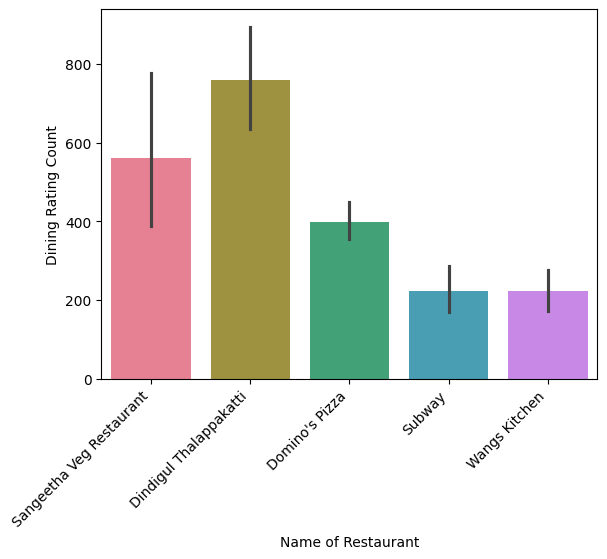

In [336]:
ax=sns.barplot(x="Name of Restaurant",y="Dining Rating Count",data=fil,palette="husl")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [230]:
#Most of the like to Dining in Dindigul Thalappakatti restaurant

### F) Finding the high and low proce food in chennai location

In [251]:
Loc_price=Zomato_data.groupby(["Location"])["Price for 2"].mean().reset_index()
Loc_price

,Location,Price for 2
0,Abhiramapuram,200.000000
1,Adambakkam,412.500000
2,Adyar,605.882353
3,Akkarai,637.500000
4,Alandur,620.000000
...,...,...
95,Vepery,406.250000
96,Vettuvankeni,650.000000
97,Virugambakkam,533.333333
98,Washermenpet,616.666667


In [242]:
Loc_price.max()
#West mambalam have maximum price food

Location       West Mambalam
Price for 2           3000.0
dtype: object

In [243]:
Loc_price.min()
#Abhiramapuram have minimum price food

Location       Abhiramapuram
Price for 2            200.0
dtype: object

[Text(0, 0, 'Abhiramapuram'),
 Text(1, 0, 'Adambakkam'),
 Text(2, 0, 'Adyar'),
 Text(3, 0, 'Akkarai'),
 Text(4, 0, 'Alandur'),
 Text(5, 0, 'Alwarpet'),
 Text(6, 0, 'Ambattur'),
 Text(7, 0, 'Aminijikarai'),
 Text(8, 0, 'Anna Nagar East'),
 Text(9, 0, 'Anna Nagar West'),
 Text(10, 0, 'Anna Salai'),
 Text(11, 0, 'Arumbakkam'),
 Text(12, 0, 'Ashok Nagar'),
 Text(13, 0, 'Avadi'),
 Text(14, 0, 'Besant Nagar'),
 Text(15, 0, 'Chengalpattu'),
 Text(16, 0, 'Chetpet'),
 Text(17, 0, 'Choolaimedu'),
 Text(18, 0, 'Chromepet'),
 Text(19, 0, 'Citadines'),
 Text(20, 0, 'East Coast Road (ECR)'),
 Text(21, 0, 'Egatoor'),
 Text(22, 0, 'Egmore'),
 Text(23, 0, 'Ekkaduthangal'),
 Text(24, 0, 'Foodies Kitchen')]

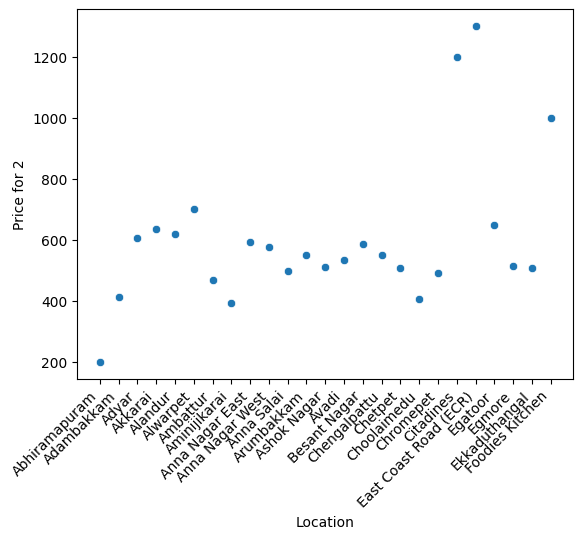

In [337]:
x=Loc_price["Location"].head(25)
at=sns.scatterplot(data=Loc_price,x=x,y="Price for 2")
at.set_xticklabels(at.get_xticklabels(), rotation=45, ha='right')

### G) Find the high rating(Dining and Delivery) and Affordable price restaurant 

In [265]:
#Find the affordable price and high rating restaurants

In [266]:
#To get the average price value
z=Zomato_data["Price for 2"].max()
aff=z/4
aff

np.float64(750.0)

In [267]:
#Store the Affordable price data
aff_price=Zomato_data
aff_price=aff_price[aff_price["Price for 2"]<=750]
aff_price.sort_values(by="Price for 2")

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
108,Rayar's Mess,Mylapore,['South Indian'],"['Pongal', ' Vada', ' Filtered Coffee', ' Idli...",100.0,4.7,904,4.3,1319,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
754,90ML,Nungambakkam,"['Tea', ' Coffee']","['Ginger Tea', ' Filtered Coffee', ' Masala Te...",100.0,4.0,173,4.3,429,"['Home Delivery', 'Outdoor Seating']"
2151,Cane 4 U,Besant Nagar,['Beverages'],"['Sugarcane Juice', ' Fruit Juices']",100.0,3.8,52,4.6,160,"['Home Delivery', 'Indoor Seating']"
1852,Mak N Bajji Shop,Triplicane,"['Chettinad', ' South Indian', ' Street Food']","['Elaneer Payasam', ' Filtered Coffee', ' Bajji']",150.0,3.8,71,4.1,342,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
695,Kolkata Chat,Alwarpet,"['Street Food', ' North Indian']","['Chaat', ' Panipuri', ' Pav Bhaji', ' Paratha...",150.0,3.1,228,3.6,2048,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
...,...,...,...,...,...,...,...,...,...,...
159,Superstar Pizza,Anna Nagar East,"['Burger', ' Pizza', ' Fast Food', ' Beverages']","['Pizza', ' Pasta Alfredo', ' Chicken Fingers'...",750.0,4.2,346,3.6,931,"['Home Delivery', 'Indoor Seating']"
60,Pantry d'or,Anna Nagar East,"['Continental', ' American', ' Italian', ' Des...","['Pizza', ' Pasta', ' Hot Chocolate', ' Pancak...",750.0,4.4,2485,3.9,9838,"['Home Delivery', 'Valet Parking Available', '..."
142,Ente Keralam,Alwarpet,['Kerala'],"['Appam', ' Biryani', ' Fish Curry', ' Thali',...",750.0,4.3,696,4.2,880,"['Home Delivery', 'Indoor Seating', 'Table res..."
533,Courtallam Border Parotta,Velachery,"['North Indian', ' South Indian', ' Chettinad']","['Carrot Halwa', ' Border Paratha', ' Chicken ...",750.0,2.2,300,3.4,881,"['Home Delivery', 'Indoor Seating']"


In [274]:
high=Zomato_data
high_rating=high[high["Dining Rating"]>=4.5]
high_rating.sort_values(by="Dining Rating")

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
67,Pumpkin Tales,Alwarpet,"['Singaporean', ' American', ' European', ' Co...","['Pumpkin Soup', ' Bibimbap', ' Noodle', ' Che...",1800.0,4.5,768,4.0,245,"['Breakfast', 'Home Delivery', 'Indoor Seating..."
68,Sandy's Chocolate Laboratory,Nungambakkam,"['Cafe', ' Continental', ' Italian', ' Desserts']","['Tiny Chocolate Cake', ' Hot Chocolate', ' Sa...",1400.0,4.5,2252,4.3,1973,"['Breakfast', 'Home Delivery', 'Free Parking',..."
111,Blind Ch3mistry,Nungambakkam,"['Cafe', ' Continental', ' Italian', ' Dessert...","['Pasta', ' Peri Peri Chicken', ' Sandwich', '...",700.0,4.5,1258,4.0,147,"['Home Delivery', 'Indoor Seating', 'Table res..."
78,Shri Rajasthani Dhaba,Anna Nagar West,"['Rajasthani', ' North Indian']","['Rajasthani Thali', ' Buttermilk', ' Roti', '...",500.0,4.5,983,4.5,5537,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
92,Fruit Shop On Greams Road,Thousand Lights,"['Beverages', ' Fast Food', ' Healthy Food', '...","['Fruit Juices', ' Sandwich', ' Mint Lime Cool...",350.0,4.5,609,4.6,1699,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
110,VB Signature,Nungambakkam,"['North Indian', ' South Indian', ' Chinese', ...","['Momos', ' Idiyappam', ' Pumpkin Soup', ' Coc...",1000.0,4.5,1611,3.8,750,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
158,BurgerMan,Besant Nagar,"['Burger', ' Fast Food', ' Beverages']","['Burgers', ' Nachos', ' Chicken Burger', ' Th...",450.0,4.5,1009,4.3,1444,"['Home Delivery', 'Free Parking', 'Indoor Seat..."
115,North East Kitchen,Egmore,"['Chinese', ' Konkan', ' Momos']","['Momos', ' Noodle', ' Pork Thali', ' Thukpa',...",450.0,4.5,705,4.3,1552,"['Home Delivery', 'Indoor Seating']"
209,Cream Stone,Alwarpet,"['Desserts', ' Ice Cream']","['Death By Chocolate', ' Ferrero Rocher', ' Wa...",350.0,4.5,1208,4.0,2552,"['Home Delivery', 'Vegetarian Only', 'Sugar Fr..."
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,"['Finger Food', ' Seafood', ' Italian', ' Cont...","['Cocktails', ' Pasta', ' Nachos', ' Mashed Po...",1600.0,4.5,964,3.4,50,"['Home Delivery', 'Full Bar Available', 'Free ..."


In [276]:
rating_delivery=high[high["Delivery Rating"]>=4.5]
rating_delivery.sort_values(by="Delivery Rating")

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
62,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,"['Desserts', ' Ice Cream']","['Sandwich', ' Gelato', ' Chocolate Icecreams'...",500.0,4.8,1516,4.5,361,"['Home Delivery', 'Outdoor Seating', 'Desserts..."
78,Shri Rajasthani Dhaba,Anna Nagar West,"['Rajasthani', ' North Indian']","['Rajasthani Thali', ' Buttermilk', ' Roti', '...",500.0,4.5,983,4.5,5537,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
163,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,"['Momos', ' Chinese']","['Momos', ' Noodle', ' Chowmein', ' Fried Momo...",350.0,4.8,1658,4.5,2825,"['Home Delivery', 'Free Parking', 'Indoor Seat..."
164,La Chocolate,Egmore,"['Bakery', ' Desserts', ' Italian', ' Continen...","['Brownie', ' Red Velvet', ' Photo Cake', ' Ch...",800.0,4.0,256,4.5,1574,"['Home Delivery', 'Vegetarian Only', 'Free Par..."
384,Firdouse,Triplicane,"['North Indian', ' Mughlai', ' Chinese', ' Che...","['Shawarma', ' Biryani', ' Chicken Grill', ' B...",800.0,3.7,528,4.5,5228,"['Home Delivery', 'Wifi', 'Indoor Seating']"
370,The Kandyan,Besant Nagar,"['North Indian', ' South Indian', ' Sri Lankan...","['Chicken Curry', ' Bhindi Fry', ' Butter Chic...",450.0,4.4,482,4.5,1704,"['Home Delivery', 'Indoor Seating', 'Table boo..."
1769,Amaravathi Andhra Home Foods,Gopalapuram,"['Mithai', ' Street Food']","['Biryani', ' Fish Fry']",250.0,3.6,83,4.5,142,"['Home Delivery', 'Vegetarian Only', 'Free Par..."
963,The Baker Ninja,Alwarpet,"['Bakery', ' Coffee']","['Brownie', ' Hot Chocolate', ' Cheesecake', '...",500.0,4.1,112,4.5,145,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
8965,Domino's Pizza,Adyar,"['Pizza', ' Fast Food']","['Chocolava Cake', ' Pizza Burger', ' Mexican ...",400.0,3.7,404,4.5,4536,"['Home Delivery', 'Indoor Seating', 'Free Park..."
8961,Domino's Pizza,Chromepet,"['Pizza', ' Fast Food']","['Pizza', ' Garlic Bread', ' Barbeque Chicken']",400.0,4.0,542,4.5,5788,"['Home Delivery', 'Catering Available', 'Indoo..."


In [310]:
#Merge the two data into one.
merged_data = pd.merge(rating_delivery, aff_price, how='inner', on=['Name of Restaurant','Location'])
#when it merge it wil create the duplicate also also data_x and data_y so we take only one and rename it.
reliable_data=merged_data[['Name of Restaurant','Location','Cuisine_x','Top Dishes_x','Price for 2_x','Dining Rating_x','Dining Rating Count_x','Delivery Rating_x','Delivery Rating Count_x','Features_x']]
New_Delivery =reliable_data.rename(columns={'Name of Restaurant':'Name of Restaurant','Location':'Location','Cuisine_x':'Cuisine','Top Dishes_x':'Top Dishes','Price for 2_x':'Price for 2','Dining Rating_x':'Dining Rating','Dining Rating Count_x':'Dining Rating Count','Delivery Rating_x':'Delivery Rating','Delivery Rating Count_x':'Delivery Rating Count','Features_x':'Features'})

### These are the most reliable, highest rated and affordable restaurants in Delivery:

#### This dataframe obtained below shows the restaurants whose:
* Cost is below : 700
* Delivery Rating is above : 4.5

In [311]:
New_Delivery

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,"['Desserts', ' Ice Cream']","['Sandwich', ' Gelato', ' Chocolate Icecreams'...",500.0,4.8,1516,4.5,361,"['Home Delivery', 'Outdoor Seating', 'Desserts..."
1,Shri Rajasthani Dhaba,Anna Nagar West,"['Rajasthani', ' North Indian']","['Rajasthani Thali', ' Buttermilk', ' Roti', '...",500.0,4.5,983,4.5,5537,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
2,Fruit Shop On Greams Road,Thousand Lights,"['Beverages', ' Fast Food', ' Healthy Food', '...","['Fruit Juices', ' Sandwich', ' Mint Lime Cool...",350.0,4.5,609,4.6,1699,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
3,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,"['Momos', ' Chinese']","['Momos', ' Noodle', ' Chowmein', ' Fried Momo...",350.0,4.8,1658,4.5,2825,"['Home Delivery', 'Free Parking', 'Indoor Seat..."
4,The Kandyan,Besant Nagar,"['North Indian', ' South Indian', ' Sri Lankan...","['Chicken Curry', ' Bhindi Fry', ' Butter Chic...",450.0,4.4,482,4.5,1704,"['Home Delivery', 'Indoor Seating', 'Table boo..."
5,The Grand Sweets and Snacks - Amirtham Restaurant,Anna Nagar West,"['Mithai', ' North Indian', ' South Indian']","['Filtered Coffee', ' Avial', ' Kuzhi Paniyara...",500.0,4.1,242,4.6,2603,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
6,The Baker Ninja,Alwarpet,"['Bakery', ' Coffee']","['Brownie', ' Hot Chocolate', ' Cheesecake', '...",500.0,4.1,112,4.5,145,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
7,Amaravathi Andhra Home Foods,Gopalapuram,"['Mithai', ' Street Food']","['Biryani', ' Fish Fry']",250.0,3.6,83,4.5,142,"['Home Delivery', 'Vegetarian Only', 'Free Par..."
8,Dominus,Anna Nagar West,"['Chinese', ' Chettinad']",['Beef Chilli'],400.0,3.6,88,4.5,969,"['Home Delivery', 'Indoor Seating']"
9,Cane 4 U,Besant Nagar,['Beverages'],"['Sugarcane Juice', ' Fruit Juices']",100.0,3.8,52,4.6,160,"['Home Delivery', 'Indoor Seating']"


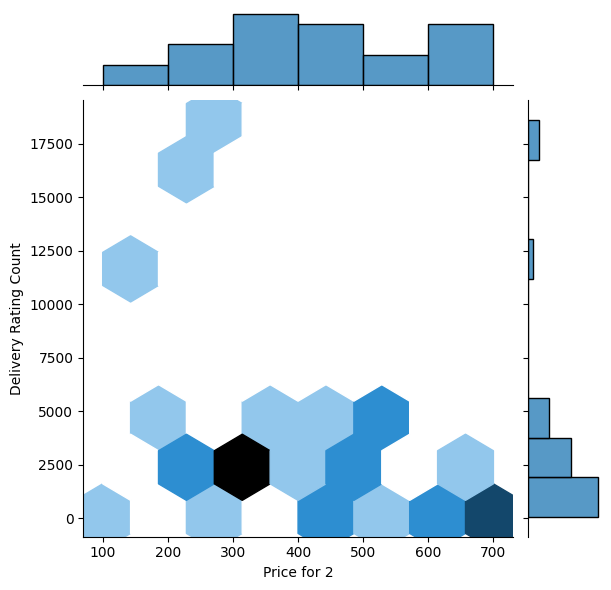

In [323]:
sns.jointplot(x="Price for 2",y="Delivery Rating Count",data=New_Dining,kind="hex")

In [330]:
#most of them likes Delivery in 250 to 300 and 450 to 500 price

### These are the most reliable, highest rated and affordable restaurants in Dining:

#### This dataframe obtained below shows the restaurants whose:
* Cost is below : 700
* Dining Rating is above : 4.5

In [308]:
#Merge the two data into one.
merged = pd.merge(high_rating, aff_price, how='inner', on=['Name of Restaurant','Location'])
#when it merge it wil create the duplicate also also data_x and data_y so we take only one and rename it.
reliable_rating=merged[['Name of Restaurant','Location','Cuisine_x','Top Dishes_x','Price for 2_x','Dining Rating_x','Dining Rating Count_x','Delivery Rating_x','Delivery Rating Count_x','Features_x']]
New_Dining=reliable_rating.rename(columns={'Name of Restaurant':'Name of Restaurant','Location':'Location','Cuisine_x':'Cuisine','Top Dishes_x':'Top Dishes','Price for 2_x':'Price for 2','Dining Rating_x':'Dining Rating','Dining Rating Count_x':'Dining Rating Count','Delivery Rating_x':'Delivery Rating','Delivery Rating Count_x':'Delivery Rating Count','Features_x':'Features'})

In [309]:
New_Dining

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Eating Circles,Alwarpet,['South Indian'],"['Rose Milk', ' Neer Dosa', ' Thatte Idli', ' ...",250.0,4.7,782,4.2,2744,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
1,Shree Mithai,Chetpet,"['Mithai', ' Street Food', ' Fast Food']","['Chaat', ' Badam Milk', ' Pav Bhaji', ' Panip...",300.0,4.6,1085,4.4,18600,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
2,Andhikkadai,Velachery,['South Indian'],"['Coffee', ' Sweet Kozhukattai', ' Idli', ' Po...",200.0,4.6,908,4.2,17300,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
3,Brownie Heaven,Royapettah,"['Bakery', ' Desserts', ' Beverages']","['Vanilla Ice Cream', ' Brownie Shake', ' Filt...",350.0,4.9,842,4.3,2270,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
4,Mezze,Alwarpet,['Middle Eastern'],"['Baklava', ' Mezze', ' Shawarma', ' Pita Brea...",700.0,4.7,1152,4.2,2249,"['Home Delivery', 'Indoor Seating']"
5,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,"['Desserts', ' Ice Cream']","['Sandwich', ' Gelato', ' Chocolate Icecreams'...",500.0,4.8,1516,4.5,361,"['Home Delivery', 'Outdoor Seating', 'Desserts..."
6,Fusilli Reasons,Kilpauk,['Fast Food'],"['Nachos', ' Iced Tea', ' Garlic Bread', ' Bro...",400.0,4.7,3042,4.4,3954,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
7,Shri Rajasthani Dhaba,Anna Nagar West,"['Rajasthani', ' North Indian']","['Rajasthani Thali', ' Buttermilk', ' Roti', '...",500.0,4.5,983,4.5,5537,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
8,Fruit Shop On Greams Road,Thousand Lights,"['Beverages', ' Fast Food', ' Healthy Food', '...","['Fruit Juices', ' Sandwich', ' Mint Lime Cool...",350.0,4.5,609,4.6,1699,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
9,Rayar's Mess,Mylapore,['South Indian'],"['Pongal', ' Vada', ' Filtered Coffee', ' Idli...",100.0,4.7,904,4.3,1319,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."


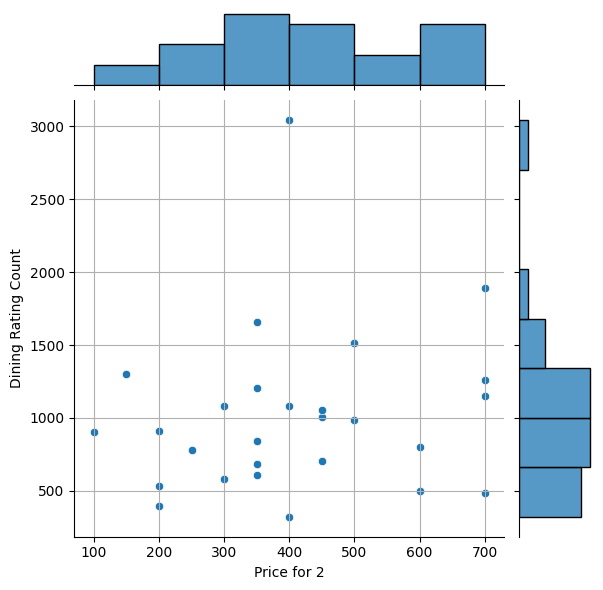

In [339]:
g=sns.jointplot(x="Price for 2",y="Dining Rating Count",data=New_Dining)
g.ax_joint.grid(True)

In [ ]:
#most of them like Dining in 300 to 550 prices 